# Length of Stay (LOS) <br>

***
**Length of stay** is observed for inpatient, skilled nursing facility (SNF), and hospice services and is calculated from the day of admission to day of discharge. 
<br>
<br>
**<center>LOS = DISCHARGE DATE - ADMISSION DATE</center>**
***
Inpatient and SNF LOS equations are identical, however, hospice LOS requires a different field for admission date.

**<center>INPATIENT LOS = NCH_BENE_DSCHRG_DT - CLM_ADMSN_DT</center>**
<br>
**<center>SNF LOS = NCH_BENE_DSCHRG_DT - CLM_ADMSN_DT</center>**
<br>
**<center>HOSPICE LOS = NCH_BENE_DSCHRG_DT - CLM_HOSPC_START_DT_ID</center>**

Visit Data.gov to download the data used for this analysis.



# Load Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from IPython.display import display, HTML
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})

# Load data

In [2]:
# load synthetic data
synthetic_bene_df = pd.read_csv('data/beneficiary_2022.csv', sep="|", low_memory=False)
synthetic_inpatient_df = pd.read_csv('data/inpatient.csv', sep="|", low_memory=False)
synthetic_hospice_df = pd.read_csv('data/hospice.csv', sep="|", low_memory=False)
synthetic_snf_df = pd.read_csv('data/snf.csv', sep="|", low_memory=False)

# Data cleaning

In [3]:
# convert dates to datetime
synthetic_inpatient_df['CLM_ADMSN_DT'] = pd.to_datetime(synthetic_inpatient_df['CLM_ADMSN_DT'])
synthetic_inpatient_df['NCH_BENE_DSCHRG_DT'] = pd.to_datetime(synthetic_inpatient_df['NCH_BENE_DSCHRG_DT'])

# Inpatient LOS

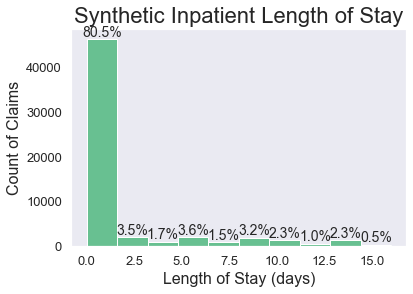

In [4]:
# set figure size
matplotlib.rcParams['figure.figsize'] = (12,8)

# convert dates to datetime
synthetic_inpatient_df['CLM_ADMSN_DT'] = pd.to_datetime(synthetic_inpatient_df['CLM_ADMSN_DT'])
synthetic_inpatient_df['NCH_BENE_DSCHRG_DT'] = pd.to_datetime(synthetic_inpatient_df['NCH_BENE_DSCHRG_DT'])

# calculate LOS
synthetic_inpatient_df['LOS'] = (synthetic_inpatient_df['NCH_BENE_DSCHRG_DT'] - synthetic_inpatient_df['CLM_ADMSN_DT'])

# convert LOS datatype to int to prep for chart
synthetic_inpatient_df["LOS"] = synthetic_inpatient_df["LOS"].dt.days

# remove outliers
synthetic_LOS_outlier = synthetic_inpatient_df[synthetic_inpatient_df.LOS < synthetic_inpatient_df.LOS.quantile(.99)]

# create chart and add bar labels
ax=sns.histplot(x='LOS', data=synthetic_LOS_outlier, color = 'mediumseagreen',bins=10)
ax.axes.set_title('Synthetic Inpatient Length of Stay',fontsize=22)
ax.set_xlabel("Length of Stay (days)",fontsize=16)
ax.set_ylabel("Count of Claims",fontsize=16)
ax.tick_params(labelsize=13)
ax.grid(False) 


# compute bar percentage labels
for c in ax.containers:
    labels = [f'{h/synthetic_LOS_outlier.LOS.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge',fontsize=14)
    

# Inpatient LOS without revenue center 450 (emergency revenue center)

In [5]:
# filter out emergency revenue center code 0450
synthetic_inpatient_df= synthetic_inpatient_df[synthetic_inpatient_df.REV_CNTR != 450]
synthetic_inpatient_df['REV_CNTR'].value_counts()

1    14977
Name: REV_CNTR, dtype: int64

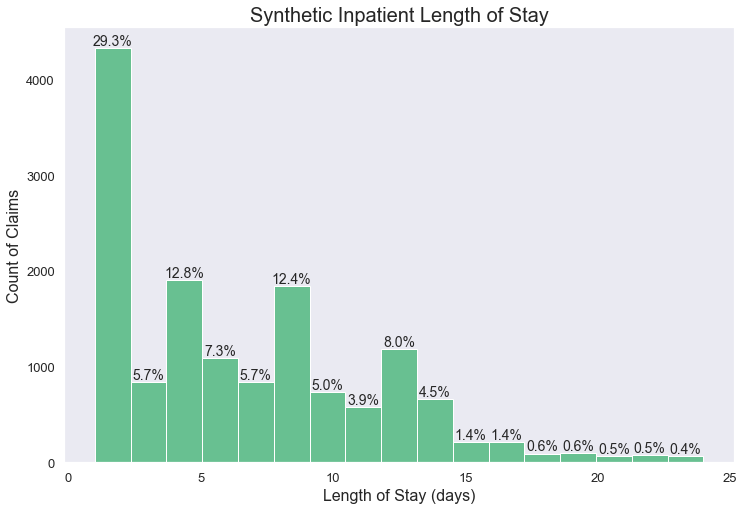

In [6]:
# set figure size
matplotlib.rcParams['figure.figsize'] = (12,8)

# convert dates to datetime
synthetic_inpatient_df['CLM_ADMSN_DT'] = pd.to_datetime(synthetic_inpatient_df['CLM_ADMSN_DT'])
synthetic_inpatient_df['NCH_BENE_DSCHRG_DT'] = pd.to_datetime(synthetic_inpatient_df['NCH_BENE_DSCHRG_DT'])

# calculate LOS
synthetic_inpatient_df['LOS'] = (synthetic_inpatient_df['NCH_BENE_DSCHRG_DT'] - synthetic_inpatient_df['CLM_ADMSN_DT'])

# convert LOS datatype to int to prep for chart
synthetic_inpatient_df["LOS"] = synthetic_inpatient_df["LOS"].dt.days

# remove outliers
synthetic_LOS_outlier = synthetic_inpatient_df[synthetic_inpatient_df.LOS < synthetic_inpatient_df.LOS.quantile(.99)]

# create chart and add bar labels
ax=sns.histplot(x='LOS', data=synthetic_LOS_outlier, color = 'mediumseagreen',bins=17)
ax.axes.set_title('Synthetic Inpatient Length of Stay',fontsize=20)
ax.set_xlabel("Length of Stay (days)",fontsize=16)
ax.set_ylabel("Count of Claims",fontsize=16)
ax.tick_params(labelsize=13)
ax.grid(False) 

# compute bar percentage labels
for c in ax.containers:
    labels = [f'{h/synthetic_LOS_outlier.LOS.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge',fontsize=14)

# Inpatient LOS countplots

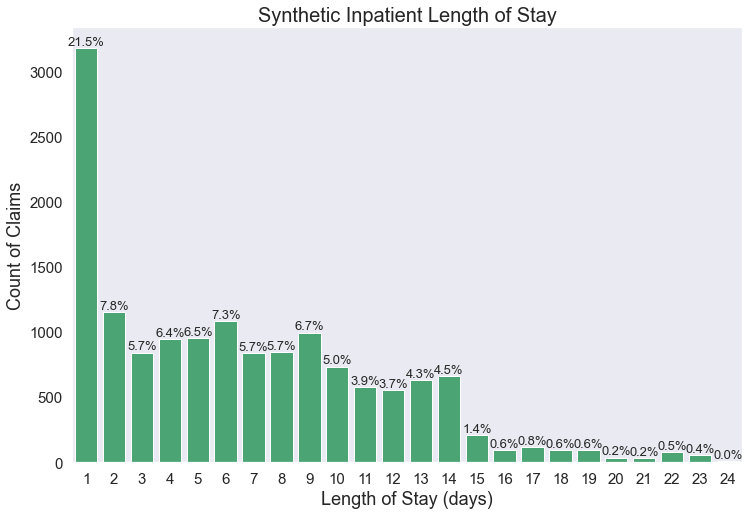

In [7]:
# set figure size
matplotlib.rcParams['figure.figsize'] = (12,8)

# convert dates to datetime
synthetic_inpatient_df['CLM_ADMSN_DT'] = pd.to_datetime(synthetic_inpatient_df['CLM_ADMSN_DT'])
synthetic_inpatient_df['NCH_BENE_DSCHRG_DT'] = pd.to_datetime(synthetic_inpatient_df['NCH_BENE_DSCHRG_DT'])

# calculate LOS
synthetic_inpatient_df['LOS'] = (synthetic_inpatient_df['NCH_BENE_DSCHRG_DT'] - synthetic_inpatient_df['CLM_ADMSN_DT'])

# convert LOS datatype to int to prep for chart
synthetic_inpatient_df["LOS"] = synthetic_inpatient_df["LOS"].dt.days

# remove outliers
synthetic_LOS_outlier = synthetic_inpatient_df[synthetic_inpatient_df.LOS < synthetic_inpatient_df.LOS.quantile(.99)]

# create chart and add bar labels
ax=sns.countplot(x='LOS', data=synthetic_LOS_outlier, color = 'mediumseagreen')
ax.axes.set_title('Synthetic Inpatient Length of Stay',fontsize=20)
ax.set_xlabel("Length of Stay (days)",fontsize=18)
ax.set_ylabel("Count of Claims",fontsize=18)
ax.tick_params(labelsize=15)
ax.grid(False) 

# compute bar percentage labels
for c in ax.containers:
    labels = [f'{h/synthetic_LOS_outlier.LOS.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge',fontsize=13)

## SNF LOS

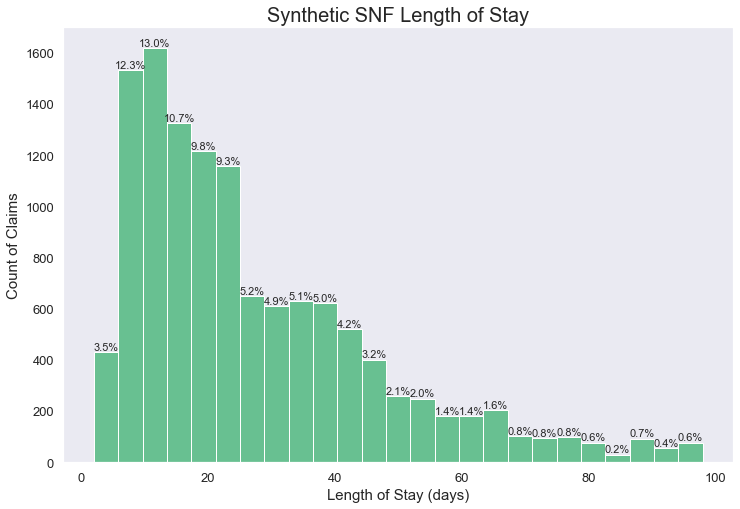

In [8]:
# set figure size
matplotlib.rcParams['figure.figsize'] = (12,8)

# convert dates to datetime
synthetic_snf_df['CLM_ADMSN_DT'] = pd.to_datetime(synthetic_snf_df['CLM_ADMSN_DT'])
synthetic_snf_df['NCH_BENE_DSCHRG_DT'] = pd.to_datetime(synthetic_snf_df['NCH_BENE_DSCHRG_DT'])

# calculate LOS
synthetic_snf_df['LOS'] = (synthetic_snf_df['NCH_BENE_DSCHRG_DT'] - synthetic_snf_df['CLM_ADMSN_DT'])

# convert LOS datatype to int to prep for chart
synthetic_snf_df["LOS"] = synthetic_snf_df["LOS"].dt.days

# remove outliers
synthetic_LOS_outlier = synthetic_snf_df[synthetic_snf_df.LOS < synthetic_snf_df.LOS.quantile(.99)]

# create chart and add bar labels
ax=sns.histplot(x='LOS', data=synthetic_LOS_outlier, color = 'mediumseagreen', bins=25)
ax.axes.set_title('Synthetic SNF Length of Stay',fontsize=20)
ax.set_xlabel("Length of Stay (days)",fontsize=15)
ax.set_ylabel("Count of Claims",fontsize=15)
ax.tick_params(labelsize=13)
ax.grid(False) 

# compute bar percentage labels
for c in ax.containers:
    labels = [f'{h/synthetic_LOS_outlier.LOS.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge',fontsize=11)

## Hospice LOS

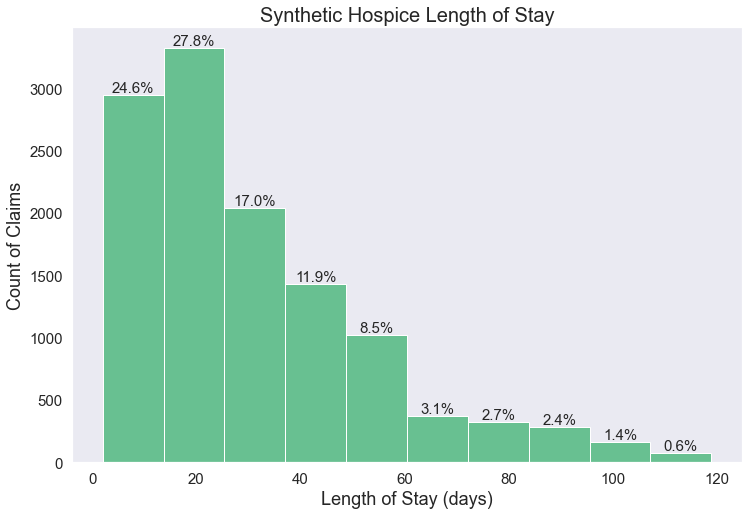

In [9]:
# set figure size
matplotlib.rcParams['figure.figsize'] = (12,8)

# convert dates to datetime
synthetic_hospice_df['CLM_HOSPC_START_DT_ID'] = pd.to_datetime(synthetic_hospice_df['CLM_HOSPC_START_DT_ID'])
synthetic_hospice_df['NCH_BENE_DSCHRG_DT'] = pd.to_datetime(synthetic_hospice_df['NCH_BENE_DSCHRG_DT'])

# of the benes who have been admitted
synthetic_hospice_df[synthetic_hospice_df['CLM_HOSPC_START_DT_ID'].notnull()]

# calculate LOS
LOS_df = (synthetic_hospice_df['NCH_BENE_DSCHRG_DT'] - synthetic_hospice_df['CLM_HOSPC_START_DT_ID']).to_frame().reset_index().rename(columns={0: "LOS"})

# convert LOS datatype to int to prep for histogram
LOS_df["LOS"] = LOS_df["LOS"].dt.days

# remove outliers
synthetic_LOS_outlier = LOS_df[LOS_df.LOS < LOS_df.LOS.quantile(.99)]

# create histogram and add bar labels
ax=sns.histplot(x='LOS', data=synthetic_LOS_outlier, color = 'mediumseagreen', bins=10)
ax.axes.set_title('Synthetic Hospice Length of Stay',fontsize=20)
ax.set_xlabel("Length of Stay (days)",fontsize=18)
ax.set_ylabel("Count of Claims",fontsize=18)
ax.tick_params(labelsize=15)
ax.grid(False)

# compute bar percentage labels
for c in ax.containers:
    labels = [f'{h/synthetic_LOS_outlier.LOS.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge',fontsize=15)